In [1]:
#Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
df = pd.read_csv("Downloads/Medicare.csv",low_memory=False)

In [3]:
#We can observe the dataset by checking a few of the rows using head() method
#which is returns the first five samples from the dataset
df.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,10,86,86,86,$32.99,$17.50,$17.50,$16.82
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,"1,809","159,365","159,385","159,385",$31.26,$16.79,$16.79,$16.62
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,53,279,279,279,$66.48,$28.18,$28.18,$27.93
3,National,NaN,National,0003M,Liver dis 10 assays w/nash,N,O,14,88,88,88,$572.58,$453.14,$451.14,$485.02
4,National,NaN,National,0005U,Test for detecting genes associated with prost...,N,O,1,"4,886","4,939","4,939",$795.00,$755.01,$755.01,$745.00


In [4]:
#info() method shows some of the characteristics of the data such as column name, No. of null-values in columns
#Dtype of the data, and memory Usage.
df.info()
#Rndrng_prvdr_Geo_Cd feature has null values
#Rndrng_Prvdr_Geo_Desc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268149 entries, 0 to 268148
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Rndrng_Prvdr_Geo_Lvl   268149 non-null  object
 1   Rndrng_Prvdr_Geo_Cd    255046 non-null  object
 2   Rndrng_Prvdr_Geo_Desc  268134 non-null  object
 3   HCPCS_Cd               268149 non-null  object
 4   HCPCS_Desc             268149 non-null  object
 5   HCPCS_Drug_Ind         268149 non-null  object
 6   Place_Of_Srvc          268149 non-null  object
 7   Tot_Rndrng_Prvdrs      268149 non-null  object
 8   Tot_Benes              268149 non-null  object
 9   Tot_Srvcs              268149 non-null  object
 10  Tot_Bene_Day_Srvcs     268149 non-null  object
 11  Avg_Sbmtd_Chrg         268149 non-null  object
 12  Avg_Mdcr_Alowd_Amt     268149 non-null  object
 13  Avg_Mdcr_Pymt_Amt      268149 non-null  object
 14  Avg_Mdcr_Stdzd_Amt     268149 non-null  object
dtype

In [5]:
df.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      13103
Rndrng_Prvdr_Geo_Desc       15
Rndrng_Prvdr_Geo_Lvl         0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [6]:
# filling with most common class
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,06,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,10,86,86,86,$32.99,$17.50,$17.50,$16.82
1,National,06,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,"1,809","159,365","159,385","159,385",$31.26,$16.79,$16.79,$16.62
2,National,06,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,53,279,279,279,$66.48,$28.18,$28.18,$27.93
3,National,06,National,0003M,Liver dis 10 assays w/nash,N,O,14,88,88,88,$572.58,$453.14,$451.14,$485.02
4,National,06,National,0005U,Test for detecting genes associated with prost...,N,O,1,"4,886","4,939","4,939",$795.00,$755.01,$755.01,$745.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268144,State,9E,Foreign Country,G2058,"Chronic care management services, each additio...",N,O,1,62,333,243,$36.64,$36.64,$29.31,$29.71
268145,State,9E,Foreign Country,J0897,"Injection, denosumab, 1 mg",Y,O,3,14,"1,140",19,$34.42,$19.51,$15.27,$15.06
268146,State,9E,Foreign Country,J1030,"Injection, methylprednisolone acetate, 40 mg",Y,O,2,14,15.5,16,$24.84,$6.06,$4.20,$4.14
268147,State,9E,Foreign Country,J3301,"Injection, triamcinolone acetonide, not otherw...",Y,O,4,16,78,19,$32.85,$1.38,$0.98,$1.05


In [7]:
# Creating dataframes for data cleaning it easy to clean large dataset
numericint = df_clean[['Tot_Rndrng_Prvdrs','Tot_Benes','Tot_Bene_Day_Srvcs']]

In [8]:
numericfloat = df_clean[['Tot_Srvcs','Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt']]

In [9]:
objectcols = df_clean[['Rndrng_Prvdr_Geo_Lvl','Rndrng_Prvdr_Geo_Cd','Rndrng_Prvdr_Geo_Desc','HCPCS_Cd','HCPCS_Drug_Ind','Place_Of_Srvc']]

In [10]:
#This feature has text column. we can ignore this column
objectcols_text = df_clean[['HCPCS_Desc']]

### Data Cleaning

#### 1) Numericint:

In [11]:
numericint.Tot_Rndrng_Prvdrs = numericint.Tot_Rndrng_Prvdrs.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/498599041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericint.Tot_Rndrng_Prvdrs = numericint.Tot_Rndrng_Prvdrs.str.replace(",","")


In [12]:
numericint.Tot_Benes = numericint.Tot_Benes.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/147864179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericint.Tot_Benes = numericint.Tot_Benes.str.replace(",","")


In [13]:
numericint.Tot_Bene_Day_Srvcs = numericint.Tot_Bene_Day_Srvcs.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/1431680303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericint.Tot_Bene_Day_Srvcs = numericint.Tot_Bene_Day_Srvcs.str.replace(",","")


In [14]:
numericint = numericint.astype('int32')

#### 2)numericfloat:

In [15]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/1984970561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace(",","")


In [16]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/4225982932.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")
C:\Users\91798\AppData\Local\Temp/ipykernel_6148/4225982932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")


In [17]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/1442461842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace(",","")


In [18]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/831516647.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")
C:\Users\91798\AppData\Local\Temp/ipykernel_6148/831516647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")


In [19]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/2447265504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace(",","")


In [20]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/116582745.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")
C:\Users\91798\AppData\Local\Temp/ipykernel_6148/116582745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")


In [21]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/2147607590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace(",","")


In [22]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/1361927190.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")
C:\Users\91798\AppData\Local\Temp/ipykernel_6148/1361927190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")


In [23]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace(",","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/2907217918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace(",","")


In [24]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_6148/193031717.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")
C:\Users\91798\AppData\Local\Temp/ipykernel_6148/193031717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")


In [25]:
numericfloat = numericfloat.astype('float64')

In [26]:
#Lets combine all the numeric columns together as one data frame
numcols = pd.concat([numericint,numericfloat],axis=1)
numcols.shape

(268149, 8)

### Finding the correlation between variables

In [27]:
import seaborn as sns

<AxesSubplot: >

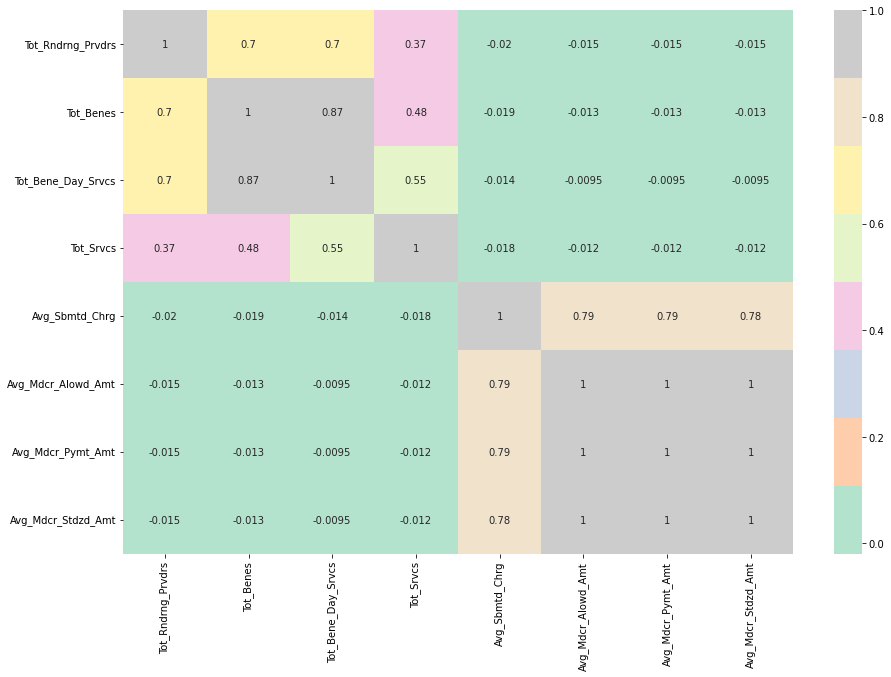

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(numcols.corr(),annot=True,cmap='Pastel2')

### Combining all dataframes into a single data frame

In [29]:
combinedf = pd.concat([objectcols,numcols],axis=1)

In [30]:
combinedf.shape

(268149, 14)

In [31]:
combinedf.describe()
#For the Target Variable- When mean > median then the data is aid to be positively skewed.
# Therefore "Avg_Mdcr_Alowd_Amt" is Positively Skewed.

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
count,268149.000000,2.681490e+05,2.681490e+05,2.681490e+05,268149.000000,268149.000000,268149.000000,268149.000000
mean,265.080384,5.102847e+03,9.813789e+03,2.217960e+04,1252.792847,294.650539,234.689176,231.083291
std,3217.362460,1.093134e+05,2.935606e+05,5.981873e+05,2377.146048,769.097494,615.856301,609.502232
min,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000e+01,3.800000e+01,4.000000e+01,125.930000,36.350000,28.720000,28.520000
50%,29.000000,1.040000e+02,1.400000e+02,1.570000e+02,429.060000,114.710000,88.850000,87.750000
75%,95.000000,5.650000e+02,8.010000e+02,1.027000e+03,1551.450000,324.140000,257.900000,255.130000
max,581706.000000,2.179407e+07,8.171052e+07,1.221294e+08,92910.470000,50821.880000,40603.950000,40010.080000


1) It tells us if the data is heavy or light tailed relative to a normal distribution.

2) Kurtosis range from -10 to +10.

In [32]:
#Impact before Logarithmic Transformation
from scipy.stats import kurtosis,skew
print(combinedf.Avg_Mdcr_Alowd_Amt.skew())
print(combinedf.Avg_Mdcr_Alowd_Amt.kurt())

30.406919766372464
1652.1810788820355


<AxesSubplot: ylabel='Density'>

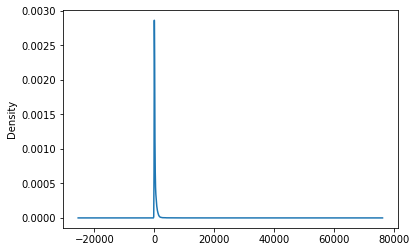

In [33]:
combinedf.Avg_Mdcr_Alowd_Amt.plot(kind ='density')

In [34]:
# Impact of Logarithmic Transformation
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

nan
nan


C:\Users\91798\.conda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
combinedf['Avg_Mdcr_Alowd_Amt'].isna().sum()

0

It's giving us nan because there are some values as the zero. In log transformation, it deals with only the postive
and negative numbers, not with zero. The log is the range in between (-infinity to infinity) but grater or lesss than zero. 

We are getting zeros inside the data, we refer to root Transformation.

#### Root Transformation

It is a transformation with a moderate effect on distribution shape. It is weaker than the logarithm and cube root. 

It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values. Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

In [36]:
#calculating the square root for Avg_Mdcr_Alowd_Amt column
print(np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

2.7842587934632936
24.062205856778522


<AxesSubplot: ylabel='Density'>

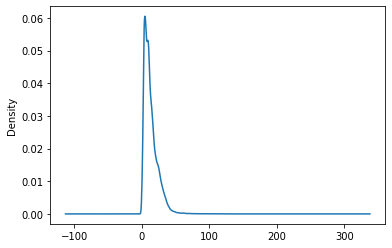

In [37]:
np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).plot(kind="density")

Note: In the previous case, we got the nan because of zero, but the square root transformation has reduced the skewed and kurtosis values.

#### Cube Root Transformation

This is fairly strong transformation with a substantial effect on distribution shape.

It is weaker than the logarithm but stronger than the square root transformation.

It is also used for reducing right skewness and has the advantage that it can be applied to zero and negative values.

In [38]:
#calculating the cub root for Avg_Mdcr_Alowd_Amt column
print(np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

1.215156912362404
4.028614277454736


<AxesSubplot: ylabel='Density'>

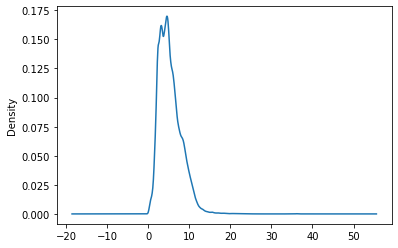

In [39]:
np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).plot(kind="density")

### Data Transformation:

### Label Encoding Object Columns:

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
objectencoded = objectcols.apply(le.fit_transform)

In [43]:
combinedf = pd.concat([objectencoded,numcols],axis = 1)

In [44]:
combinedf.shape

(268149, 14)

#### Lets Divide the data into two parts X and y

In [45]:
# Since there is high collinearity between 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt' and 'Avg_Mdcr_Allowd_Amt'
# I have dropped variables Avg_Mdcr_Pymt_Amt and 'Avg_Mdcr_Stdzd_Amt'
y = combinedf.Avg_Mdcr_Alowd_Amt
X = combinedf.drop(['Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt','Avg_Mdcr_Alowd_Amt'],axis=1)

In [46]:
X.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg
0,0,4,33,0,0,0,10,86,86,86.0,32.99
1,0,4,33,0,0,1,1809,159365,159385,159385.0,31.26
2,0,4,33,1,0,1,53,279,279,279.0,66.48
3,0,4,33,2,0,1,14,88,88,88.0,572.58
4,0,4,33,3,0,1,1,4886,4939,4939.0,795.00


In [47]:
y.head()

0     17.50
1     16.79
2     28.18
3    453.14
4    755.01
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

#### Training and Testing

Now let's split the data into a training set and testing set. We will train out model on the training set and then use the test to evaluate the model

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.7, random_state= 25)

### Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

In [50]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [51]:
X_train.shape, y_train.shape

((187704, 11), (187704,))

In [52]:
X_test.shape, y_test.shape

((80445, 11), (80445,))

### Model Building

As the Dependent Variable is "Continous", Let us build Regression Models.

#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
#making prediction
Predict = lr.predict(X_test)
Predict

array([359.87721887,  64.18219957,  78.51275447, ..., 973.51140952,
       -73.80566439,  43.38180218])

In [55]:
# Train Score
training_model_score = lr.score(X_train, y_train)*100
print("Model Score Training data",training_model_score)

Model Score Training data 64.3716298352296


In [56]:
##Test Score
testing_model_score = lr.score(X_test,y_test)*100
print("Model score of Testing data",testing_model_score)

Model score of Testing data 63.21703601618107


In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test,Predict)*100
print('Model score:',score)

Model score: 63.21703601618107


In [58]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,Predict)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,Predict)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, Predict))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 145.08928205182667
Mean Square Error (MSE): 210918.1917595839
Root Mean Square Error (RMSE): 459.2583061410908


#### Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

In [60]:
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model= Lasso(alpha=a).fit(X_train,y_train)
    train_score = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,Y_pred)
    Mse=metrics.mean_squared_error(y_test,Y_pred)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0001
,train_score:64.370000,R2:63.220000,MAE:145.089174,MSE:210918.183440,RMSE:459.258297
Alpha:0.0010
,train_score:64.370000,R2:63.220000,MAE:145.088204,MSE:210918.108641,RMSE:459.258216
Alpha:0.0100
,train_score:64.370000,R2:63.220000,MAE:145.078535,MSE:210917.368688,RMSE:459.257410
Alpha:0.1000
,train_score:64.370000,R2:63.220000,MAE:144.984624,MSE:210910.799678,RMSE:459.250258
Alpha:0.3000
,train_score:64.370000,R2:63.220000,MAE:144.805038,MSE:210900.807157,RMSE:459.239379
Alpha:0.5000
,train_score:64.370000,R2:63.220000,MAE:144.646479,MSE:210897.329753,RMSE:459.235593
Alpha:0.7000
,train_score:64.370000,R2:63.220000,MAE:144.491863,MSE:210892.582588,RMSE:459.230424
Alpha:0.9000
,train_score:64.360000,R2:63.220000,MAE:144.333482,MSE:210885.663493,RMSE:459.222891
Alpha:1.0000
,train_score:64.360000,R2:63.220000,MAE:144.256281,MSE:210883.079401,RMSE:459.220077
Alpha:10.0000
,train_score:64.290000,R2:63.240000,MAE:137.190758,MSE:210764.780598,RMSE:459.091255
Alpha:100.0000
,tra

In [61]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [62]:
y_pred

array([373.07476588,  53.26818789,  67.96795931, ..., 960.34830296,
       -46.0108529 ,  54.90684724])

In [63]:
lasso.score(X_train,y_train)*100

64.28785267577568

In [64]:
lasso.score(X_test,y_test)*100

63.24379007280441

In [65]:
r2_score(y_test,y_pred)*100

63.24379007280441

In [66]:
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 137.19075820312682
Mean Square Error (MSE): 210764.78059762012
Root Mean Square Error (RMSE): 459.0912551961975


### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

In [68]:
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model= Ridge(alpha=a).fit(X_train,y_train)
    train_score1 = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred1 = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,Y_pred1)
    Mse=metrics.mean_squared_error(y_test,Y_pred1)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0001
,train_score:61.610000,R2:63.220000,MAE:145.089282,MSE:210918.191745,RMSE:459.258306
Alpha:0.0010
,train_score:61.610000,R2:63.220000,MAE:145.089281,MSE:210918.191609,RMSE:459.258306
Alpha:0.0100
,train_score:61.610000,R2:63.220000,MAE:145.089273,MSE:210918.190253,RMSE:459.258305
Alpha:0.1000
,train_score:61.610000,R2:63.220000,MAE:145.089192,MSE:210918.176689,RMSE:459.258290
Alpha:0.3000
,train_score:61.610000,R2:63.220000,MAE:145.089013,MSE:210918.146549,RMSE:459.258257
Alpha:0.5000
,train_score:61.610000,R2:63.220000,MAE:145.088834,MSE:210918.116410,RMSE:459.258224
Alpha:0.7000
,train_score:61.610000,R2:63.220000,MAE:145.088654,MSE:210918.086273,RMSE:459.258191
Alpha:0.9000
,train_score:61.610000,R2:63.220000,MAE:145.088475,MSE:210918.056137,RMSE:459.258158
Alpha:1.0000
,train_score:61.610000,R2:63.220000,MAE:145.088385,MSE:210918.041070,RMSE:459.258142
Alpha:10.0000
,train_score:61.610000,R2:63.220000,MAE:145.080316,MSE:210916.686404,RMSE:459.256667
Alpha:100.0000
,tra

In [69]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=0.0001)
ridgeR.fit(X_train, y_train)
y_pred2 = ridgeR.predict(X_test)

In [70]:
#Training Score
ridgeR.score(X_train,y_train)*100

64.3716298352296

In [71]:
#Testing score
ridgeR.score(X_test,y_test)*100

63.21703601880932

In [72]:
r2_score(y_test,y_pred2)*100

63.21703601880932

In [73]:
MAE=metrics.mean_absolute_error(y_test,y_pred2)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred2)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 145.08928196213463
Mean Square Error (MSE): 210918.1917445132
Root Mean Square Error (RMSE): 459.25830612468314


### Elastic Net

In [74]:
from sklearn.linear_model import ElasticNet 

In [75]:
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model= ElasticNet(alpha=a).fit(X_train,y_train)
    train_score1 = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred2 = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,Y_pred2)
    Mse=metrics.mean_squared_error(y_test,Y_pred2)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0001
,train_score:61.610000,R2:63.220000,MAE:145.080814,MSE:210916.774713,RMSE:459.256763
Alpha:0.0010
,train_score:61.610000,R2:63.220000,MAE:145.004766,MSE:210904.158036,RMSE:459.243027
Alpha:0.0100
,train_score:61.610000,R2:63.240000,MAE:144.260259,MSE:210791.001986,RMSE:459.119812
Alpha:0.1000
,train_score:61.610000,R2:63.250000,MAE:137.902077,MSE:210721.625824,RMSE:459.044253
Alpha:0.3000
,train_score:61.610000,R2:62.440000,MAE:128.894300,MSE:215359.432568,RMSE:464.068349
Alpha:0.5000
,train_score:61.610000,R2:60.980000,MAE:126.253840,MSE:223734.722470,RMSE:473.006049
Alpha:0.7000
,train_score:61.610000,R2:59.220000,MAE:129.793223,MSE:233836.307452,RMSE:483.566239
Alpha:0.9000
,train_score:61.610000,R2:57.340000,MAE:135.361302,MSE:244633.674892,RMSE:494.604564
Alpha:1.0000
,train_score:61.610000,R2:56.380000,MAE:138.295381,MSE:250103.648262,RMSE:500.103638
Alpha:10.0000
,train_score:61.610000,R2:19.830000,MAE:243.535419,MSE:459690.123119,RMSE:678.004516
Alpha:100.0000
,tra

In [76]:
e_net = Ridge(alpha=0.1000)
e_net.fit(X_train, y_train)

Ridge(alpha=0.1)

In [77]:
en_y_pred = e_net.predict(X_test)

In [78]:
# train score
train_score=round(e_net.score(X_train,y_train)*100,2)
print('Train score of ENet Regression:',train_score)

Train score of ENet Regression: 64.37


In [79]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,en_y_pred)*100,2)
print("r_2 score of ENet",score)

r_2 score of ENet 63.22


In [80]:
MAE=metrics.mean_absolute_error(y_test,en_y_pred)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,en_y_pred)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, en_y_pred))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 145.08919235965797
Mean Square Error (MSE): 210918.1766890765
Root Mean Square Error (RMSE): 459.25828973364924


### Ensemble Methods

### Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
#Predicting
Predict1 = rf.predict(X_test)
Predict1

array([258.0928,  33.1943,  35.5382, ..., 730.9   ,  98.8062, 113.9309])

In [83]:
#Training Score
Train_score = rf.score(X_train,y_train)*100
print('Training score:',Train_score)

Training score: 98.91066653216825


In [84]:
#Testing score
Test_score = rf.score(X_test,y_test)*100
print('Testing_score:',Test_score)

Testing_score: 89.50040589714861


In [85]:
Score = r2_score(y_test,Predict1)*100
print('Model Score',Score)

Model Score 89.50040589714861


In [86]:
MAE = metrics.mean_absolute_error(y_test,Predict1)
print('Mean Absolute Error (MAE):',MAE)
mse = metrics.mean_squared_error(y_test,Predict1)
print('Mean Squared Error (MSE):',mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test,Predict1))
print('Root Mean Squared Error (RMSE):',rmse)              

Mean Absolute Error (MAE): 84.14270624028842
Mean Squared Error (MSE): 60206.007415748376
Root Mean Squared Error (RMSE): 245.36912482166207


In [87]:
def get_feature_importance(rf, X_train):
  # feature importance
  # The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
  for importance, name in sorted(zip(rf.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

  # plot
  plt.xticks(rotation='vertical')
  plt.bar(X_train.columns, rf.feature_importances_, align='edge', width=0.3)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance for the Random Forest")
  plt.show()

Avg_Sbmtd_Chrg 0.7121966790349794
HCPCS_Cd 0.11891380250474119
HCPCS_Drug_Ind 0.07179412220879007
Place_Of_Srvc 0.04733104519905953
Rndrng_Prvdr_Geo_Cd 0.010416193392579093
Tot_Rndrng_Prvdrs 0.010350552655834509
Rndrng_Prvdr_Geo_Desc 0.008900634716215595
Tot_Benes 0.007629253760458801
Tot_Srvcs 0.006024492158720488
Tot_Bene_Day_Srvcs 0.00595761704349122
Rndrng_Prvdr_Geo_Lvl 0.00048560732513002874


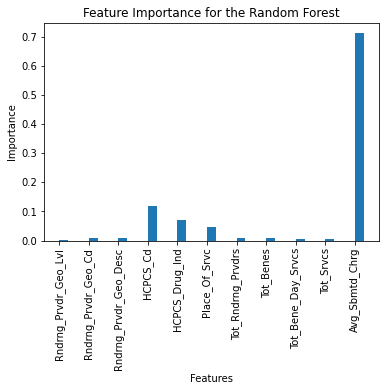

In [88]:
get_feature_importance(rf, X_train)

### Gradient Boosting 

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gbmodel = gb.fit(X_train,y_train)

In [90]:
#Predicting
Predict2 = gbmodel.predict(X_test)
Predict2

array([340.39472993,  35.95880569,  32.04516357, ..., 885.85062303,
        87.40894807,  80.61394473])

In [91]:
#Training score
Training_score = gbmodel.score(X_train,y_train)*100
print('Train score:',Training_score)

Train score: 90.82941360486569


In [92]:
#Testing score
Testing_score = gbmodel.score(X_test,y_test)*100
print('Test score:',Testing_score)

Test score: 89.94508758407865


In [93]:
Score = r2_score(y_test,Predict2)*100
print('Model score:',Score)

Model score: 89.94508758407865


In [94]:
MAE = metrics.mean_absolute_error(y_test,Predict2)
print('Mean Absolute Error (MAE):',MAE)
MSE = metrics.mean_squared_error(y_test,Predict2)
print('Mean Squared Error (MSE):',MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,Predict2))
print('Root Mean Squared Error (RMSE):',RMSE)

Mean Absolute Error (MAE): 96.41368059447997
Mean Squared Error (MSE): 57656.14608980554
Root Mean Squared Error (RMSE): 240.1169425296881


### XGBoost Regressor

In [95]:
from xgboost import XGBRegressor 
xgb = XGBRegressor()

In [96]:
 # Fit the model to the training data
xgbmodel = xgb.fit(X_train, y_train)

In [97]:
#Predicting
Pred = xgbmodel.predict(X_test)
Pred

array([286.6089  ,  33.0719  ,  38.214314, ..., 811.65985 ,  75.93393 ,
        87.12183 ], dtype=float32)

In [98]:
#Training score
Training_score = xgbmodel.score(X_train,y_train)*100
print('Train score:',Training_score)

Train score: 97.2219037845799


In [99]:
#Testing score
Testing_score = xgbmodel.score(X_test,y_test)*100
print('Test score:',Testing_score)

Test score: 91.01346739071845


In [100]:
Score = r2_score(y_test,Pred)*100
print('Model score:',Score)

Model score: 91.01346739071845


In [101]:
MAE = metrics.mean_absolute_error(y_test,Pred)
print('Mean Absolute Error (MAE):',MAE)
MSE = metrics.mean_squared_error(y_test,Pred)
print('Mean Squared Error (MSE):',MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,Pred))
print('Root Mean Squared Error (RMSE):',RMSE)

Mean Absolute Error (MAE): 84.65546252658939
Mean Squared Error (MSE): 51529.92045371901
Root Mean Squared Error (RMSE): 227.0020274220453


In [102]:
def get_feature_importance(xgbmodel, X_train):
  # feature importance
  # The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
  for importance, name in sorted(zip(xgbmodel.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

  # plot
  plt.xticks(rotation='vertical')
  plt.bar(X_train.columns, xgbmodel.feature_importances_, align='edge', width=0.3)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance for the XGB Classifier")
  plt.show()

HCPCS_Drug_Ind 0.83366233
Avg_Sbmtd_Chrg 0.09231701
Place_Of_Srvc 0.04456501
HCPCS_Cd 0.009052192
Rndrng_Prvdr_Geo_Desc 0.0054314905
Rndrng_Prvdr_Geo_Lvl 0.0036720645
Rndrng_Prvdr_Geo_Cd 0.002899141
Tot_Benes 0.002854844
Tot_Bene_Day_Srvcs 0.0024625945
Tot_Rndrng_Prvdrs 0.0017039353
Tot_Srvcs 0.0013793644


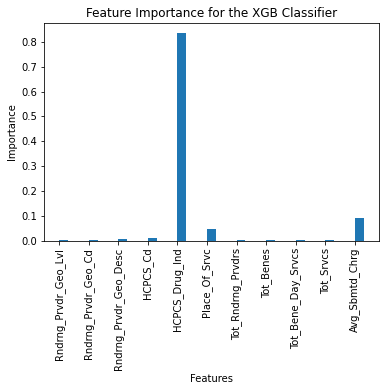

In [103]:
get_feature_importance(xgbmodel, X_train)

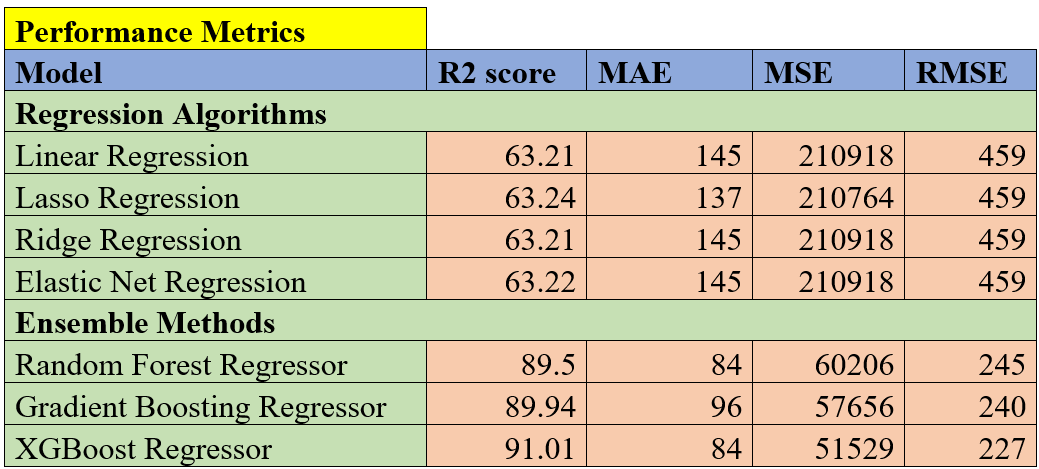